# Image Transformation

In [1]:
# Importing packages
import numpy as np
import numpy as np
import imageio
from scipy import misc
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

## Pixeling an image

/var/folders/sl/c5pyww8j61j6_9_z4twp2ygc0000gn/T/ipykernel_64074/195134043.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('../images/773-8.jpg')


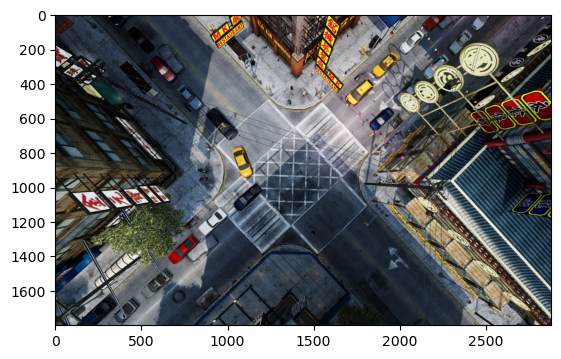

In [3]:
# Importing image
img = imageio.imread('../images/773-8.jpg')

# Plotting image
plt.imshow(img)

In [12]:
from PIL import Image

# Open image
img = Image.open('../images/IMG_3717.jpg')

# Resize smoothly down to 16x16 pixels
imgSmall = img.resize((64,64), resample=Image.Resampling.BILINEAR)

# Scale back up using NEAREST to original size
result = imgSmall.resize(img.size, Image.Resampling.NEAREST)

# Save
result.save('../images/IMG_3717-pix.jpg')

/var/folders/sl/c5pyww8j61j6_9_z4twp2ygc0000gn/T/ipykernel_64074/3103792232.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('../images/IMG_3717-pix.jpg')


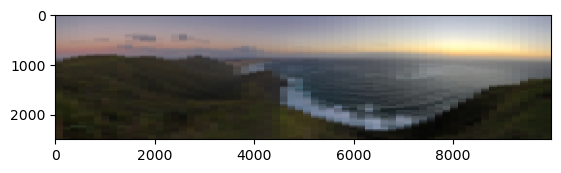

In [13]:
# Take the pixeled image and add some blinking lights to it, save it as a gif
# Importing image
img = imageio.imread('../images/IMG_3717-pix.jpg')

# Plotting image
plt.imshow(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


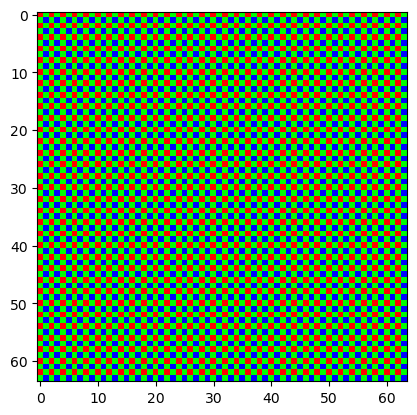

In [14]:
# Add 15 random blinking pixels to the image and save it as a gif file
# Importing image
img = imageio.imread('../images/IMG_3717-pix.jpg')

for i in range(15):
    # Randomly select a pixel
    x = np.random.randint(0, img.shape[0])
    y = np.random.randint(0, img.shape[1])

    # Set the pixel to white
    img[x,y] = 255

# Plotting image
plt.imshow(img)


In [57]:
import PIL
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, show
import matplotlib.animation as animation

#this is crucial to animation in matplotlib
%matplotlib notebook

# Select the size (px) of each square + number of squares
sq_size = 10
num_squares = 10
im_size = 10

#function to generate squares full of different colours
def next_shape(im, num_squares, sq_size):
    pix = im.load()
    #initialise plot location
    startx, starty = 0, 0
    for i in range(num_squares):
        startx += sq_size
        for j in range(num_squares):
            starty += sq_size
            rshade = np.random.randint(0, 256)
            gshade = np.random.randint(0, 256)
            bshade = np.random.randint(0, 256)
    for x in range(sq_size):
                for y in range(sq_size):
                    value = (rshade, gshade, bshade)
                    pix[(startx + x) % im_size, (starty + y) % im_size] = value
                    # return list of pixel tuples in the image
                    return list(im.getdata())



# create a figure to place the animation
fig = plt.figure()

# create a placeholder image inside the figure

im = Image.new('RGB', (im_size, im_size))

# create a list to store all the images in the format of a list of RGB pixels
im_list_pix = []

# generate a bunch of images in the form of a list of RGB pixels
for pic in range(10):
    im_list_pix.append(next_shape(im, num_squares, sq_size))

# create a list to store images converted from RGB pixel tuples to image format
img_array = []

# convert list of pixel tuples back to image
for i, v in enumerate(im_list_pix):
    im = Image.new('RGB', (10, 10))
    #put the pixel data into the image container
    im.putdata(im_list_pix[i])

    im = plt.imshow(im)
    img_array.append([im])

# animate the results
# interval is the pause between images
ani = animation.ArtistAnimation(fig, img_array, interval=1000)
# display the output of the animation
plt.show()

In [58]:
ani.save('line.gif', dpi=120, writer='imagemagick')